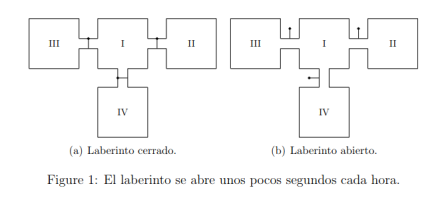

En el instante inicial 20 ratones se encuentran en el compartimiento I. Las puertas que separan los compartimientos permanecen cerradas salvo durante un breve lapso cada hora, donde los ratones pueden pasar a un comportamiento adyacente o permanecer en el mismo. Se supone que nada distingue un compartimento de otro, es decir que es igualmente probable que un ratón pase a cualquiera de los adyacentes o se quede en el compartimiento en el que está. Se realizan observaciones cada hora y se registra el número de ratones en cada compartimiento.

a) Determinar la matriz de transición del proceso P.

b) Determinar cuántos ratones habrá en cada celda al cabo de 4 horas.

c) Decidir si existe o no un estado de equilibrio.

d) Decidir si existe P∞ y en tal caso calcularla. ¿Qué aspecto tiene? ¿Por qué?

In [ ]:
Ratones_Inciciales = 20

In [ ]:
# a)
# Llamemos ti a cada suceso de apertura de puertas -que es cada una hora-.
# Existe una posibilidad entre 4 del ratón de moverse, ya sea a II, III, IV o quedarse en I en cada t.

t0 = "I"



In [1]:
import pandas as pd

En el archivo infantesConBajoPesoAlNacer.txt se encuentran los datos correspondientes a mediciones de 100 niños nacidos con bajo peso en Boston (Labor and Deliver Characteristics and the Risk of Germinal Matrix Hemorrhage in Low Birth Weight Infants. Journal of Child Neurology, 6(1), 35-40, (1991)).

Definimos las siguientes variables:

- Y: perímetro cefálico del bebé al nacer, en centímetros (columna headcirc).
- X1: edad gestacional del bebé al nacer, en semanas (columna gestage).
- X2: peso al nacer del bebé, en gramos (columna birthwt).

Tareas:

a) Graficar X1 vs. Y y X2 vs. Y. ¿Qué tipo de relación observas en cada caso?

b) Plantear un modelo de regresión lineal para predecir el perímetro cefálico del bebé en función de su edad gestacional.

c) Plantear un modelo de regresión lineal múltiple para predecir el perímetro cefálico del bebé en función de su edad gestacional y de su peso al nacer.

d) Si en el modelo obtenido en el ítem anterior mantenemos constante la edad gestacional, ¿cuántos centímetros de aumento en el perímetro cefálico, en promedio, se corresponden con cada incremento del peso en 10 gramos?

In [3]:
Archivo = 'infantesConBajoPesoAlNacer.txt'

df = pd.read_csv(Archivo)

df.head()

,headcirc,length,gestage,birthwt,momage,toxemia
0,27,41,29,1360,37,0
1,29,40,31,1490,34,0
2,30,38,33,1490,32,0
3,28,38,31,1180,37,0
4,29,38,30,1200,29,1


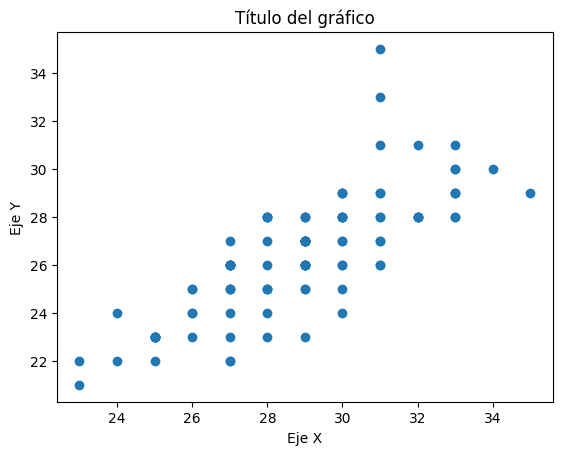

In [14]:
import matplotlib.pyplot as plt

Y = df['headcirc']
X1 = df[' gestage']
X2 = df[' birthwt']


# Mostrar gráfico.

plt.show()

# Etiquetas de eje y título.
plt.title('Título del gráfico')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.scatter(X1, Y)

In [9]:
df.columns

Index(['headcirc', ' length', ' gestage', ' birthwt', ' momage', ' toxemia'], dtype='object')